In [1]:
from math import log                         
def calcShannonEnt(dataSet):
    numEntries=len(dataSet)
    labelCounts={}
    for featVec in dataSet:
        currentLabel =featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1
    shannonEnt=0.0
    for key in labelCounts:
        prob=float(labelCounts[key])/numEntries
        shannonEnt -=prob*log(prob,2)
    return shannonEnt

In [2]:
def createDataSet():
    dataSet =[ [1,1, 'yes'],
            [1,1, 'yes'],
            [1,0, 'no'],
            [0,1, 'no'],
            [0,1, 'no']]
    labels= ['no surfacing','flippers']
    return dataSet,labels

In [3]:
myDat,labels=createDataSet()
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [4]:
calcShannonEnt(myDat)

0.9709505944546686

In [5]:
def splitDataSet(dataSet,axis,value):
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis]==value:
            reducedFeatVec=featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [10]:
splitDataSet(myDat,0,1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [6]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0
    bestFeature=-1
    for i  in range(numFeatures):
        featList=[example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i ,value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy
        if(infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
        return bestFeature

In [7]:
myDat,labels=createDataSet()
chooseBestFeatureToSplit(myDat)

0

In [8]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [9]:
import operator
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys():classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1) , reverse=True)
    return sortedClassCount[0][0]

In [10]:
def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0])== len(classList):
        return classList[0]
    if len(dataSet[0])==1:
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet (dataSet,bestFeat,value),subLabels)
    return myTree 

In [11]:
myDat,labels=createDataSet()
myTree =createTree(myDat,labels)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [12]:
def classify(inputTree, featLabels, testVec):
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else: classLabel = secondDict[key]
    return classLabel

In [13]:
myDat,labels=createDataSet()
labels

['no surfacing', 'flippers']

In [16]:
import treePlotter
myTree = treePlotter.retrieveTree(0)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [17]:
classify(myTree, labels,[1,0])

'no'

In [18]:
classify(myTree, labels,[1,1])

'yes'

In [19]:
def storeTree( inputTree, filename):
    import pickle
    fw = open(filename, 'wb')
    pickle.dump(inputTree, fw)
    fw.close()

In [20]:
def grabTree(filename):
    import pickle
    fr = open(filename,'rb+')
    return pickle.load(fr)

In [21]:
storeTree(myTree, 'classifierStorage.txt')
grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

{'ages': {'presbyopic': {'prescript': {'hyper': {'astigmatic': {'no': {'tearRate': {'normal': 'soft', 'reduced': 'no lenses'}}, 'yes': 'no lenses'}}, 'myope': {'astigmatic': {'no': 'no lenses', 'yes': {'tearRate': {'normal': 'hard', 'reduced': 'no lenses'}}}}}}, 'young': {'tearRate': {'soft': 'soft', 'no lenses': 'no lenses', 'hard': 'hard'}}, 'pre': {'prescript': {'hyper': {'astigmatic': {'no': {'tearRate': {'normal': 'soft', 'reduced': 'no lenses'}}, 'yes': 'no lenses'}}, 'myope': {'astigmatic': {'no': {'tearRate': {'normal': 'soft', 'reduced': 'no lenses'}}, 'yes': {'tearRate': {'normal': 'hard', 'reduced': 'no lenses'}}}}}}}}


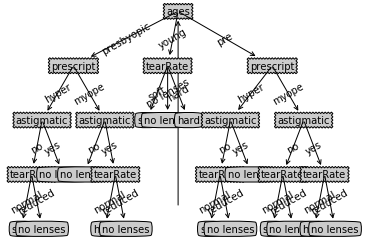

In [22]:
import treePlotter as tP
fr = open('lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['ages','prescript','astigmatic','tearRate']
lensesTree = createTree(lenses,lensesLabels)
print(lensesTree)
tP.createPlot(lensesTree)

In [54]:
print(lensesTree)

{'ages': {'presbyopic': {'prescript': {'hyper': {'astigmatic': {'no': {'tearRate': {'normal': 'soft', 'reduced': 'no lenses'}}, 'yes': 'no lenses'}}, 'myope': {'astigmatic': {'no': 'no lenses', 'yes': {'tearRate': {'normal': 'hard', 'reduced': 'no lenses'}}}}}}, 'young': {'tearRate': {'soft': 'soft', 'no lenses': 'no lenses', 'hard': 'hard'}}, 'pre': {'prescript': {'hyper': {'astigmatic': {'no': {'tearRate': {'normal': 'soft', 'reduced': 'no lenses'}}, 'yes': 'no lenses'}}, 'myope': {'astigmatic': {'no': {'tearRate': {'normal': 'soft', 'reduced': 'no lenses'}}, 'yes': {'tearRate': {'normal': 'hard', 'reduced': 'no lenses'}}}}}}}}


In [55]:
print(lensesLabels)

['prescript', 'astigmatic', 'tearRate']


In [56]:
print(lenses)

[['young', 'myope', 'no', 'reduced', 'no lenses'], ['young', 'myope', 'no', 'normal', 'soft'], ['young', 'myope', 'yes', 'reduced', 'no lenses'], ['young', 'myope', 'yes', 'normal', 'hard'], ['young', 'hyper', 'no', 'reduced', 'no lenses'], ['young', 'hyper', 'no', 'normal', 'soft'], ['young', 'hyper', 'yes', 'reduced', 'no lenses'], ['young', 'hyper', 'yes', 'normal', 'hard'], ['pre', 'myope', 'no', 'reduced', 'no lenses'], ['pre', 'myope', 'no', 'normal', 'soft'], ['pre', 'myope', 'yes', 'reduced', 'no lenses'], ['pre', 'myope', 'yes', 'normal', 'hard'], ['pre', 'hyper', 'no', 'reduced', 'no lenses'], ['pre', 'hyper', 'no', 'normal', 'soft'], ['pre', 'hyper', 'yes', 'reduced', 'no lenses'], ['pre', 'hyper', 'yes', 'normal', 'no lenses'], ['presbyopic', 'myope', 'no', 'reduced', 'no lenses'], ['presbyopic', 'myope', 'no', 'normal', 'no lenses'], ['presbyopic', 'myope', 'yes', 'reduced', 'no lenses'], ['presbyopic', 'myope', 'yes', 'normal', 'hard'], ['presbyopic', 'hyper', 'no', 'redu